## Initialization

In [49]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split
from sklearn.model_selection import train_test_split

# Random Forest model
from sklearn.ensemble import RandomForestRegressor

# XGBoost model
import xgboost as xgb
from xgboost import plot_importance

# Voting Regressor
from sklearn.ensemble import VotingRegressor

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Handling categorical variables
from sklearn.preprocessing import OrdinalEncoder

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Exporting Model
import joblib


# Data Preparation

## Load Data

In [50]:
# Load Data
df_original = pd.read_csv('Resale Flat Price.csv')
df_original

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
191138,2024-10,YISHUN,4 ROOM,303,YISHUN CTRL,10 TO 12,105.0,Model A,1988,63 years 02 months,582000.0
191139,2024-10,YISHUN,4 ROOM,450,YISHUN RING RD,07 TO 09,92.0,Model A,2012,86 years 11 months,593500.0
191140,2024-10,YISHUN,4 ROOM,112,YISHUN RING RD,10 TO 12,89.0,Simplified,1985,60 years 02 months,490000.0
191141,2024-10,YISHUN,4 ROOM,468A,YISHUN ST 43,10 TO 12,93.0,Model A,2019,94 years 03 months,620000.0


## Data Exploration

In [51]:
df_original.info() # Quick summary of the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191143 entries, 0 to 191142
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                191143 non-null  object 
 1   town                 191143 non-null  object 
 2   flat_type            191143 non-null  object 
 3   block                191143 non-null  object 
 4   street_name          191143 non-null  object 
 5   storey_range         191143 non-null  object 
 6   floor_area_sqm       191143 non-null  float64
 7   flat_model           191143 non-null  object 
 8   lease_commence_date  191143 non-null  int64  
 9   remaining_lease      191143 non-null  object 
 10  resale_price         191143 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.0+ MB


We can see that most of the data are object data which includes strings. We can see that there are many non-linearly related categorical variables such as street_name and town

In [52]:
df_original.describe() # Describe the numerical data

,floor_area_sqm,lease_commence_date,resale_price
count,191143.000000,191143.000000,1.911430e+05
mean,97.057609,1996.128872,5.042504e+05
std,24.040712,14.110106,1.758282e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.750000e+05
50%,93.000000,1996.000000,4.730000e+05
75%,112.000000,2011.000000,6.000000e+05
max,366.700000,2020.000000,1.588000e+06


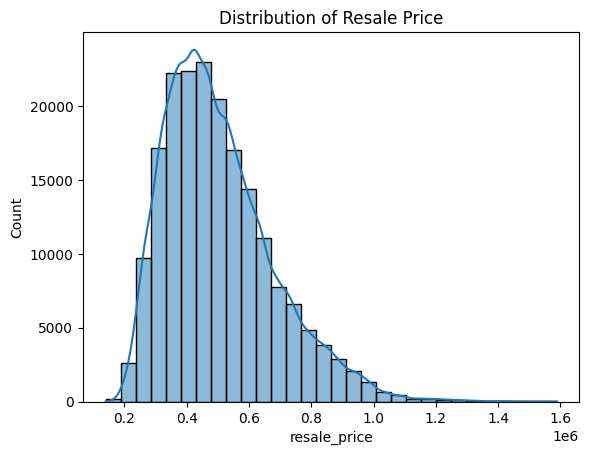

In [53]:
# Visualize the distribution of the resale price
sns.histplot(df_original['resale_price'], bins=30, kde=True)
plt.title('Distribution of Resale Price')
plt.show()

In [54]:
df_original.isnull().sum() # Check for null value

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

The data is relatively clean with no null values

## Data Cleaning

In [55]:
df = df_original.copy()

# Extract the number of years from `remaining_lease`
df['remaining_lease'] = df['remaining_lease'].apply(lambda x: int(x.split()[0])).astype(int)

# Extract convert storey_range to integer
# Function to extract the lowest floor number from the storey_range
def extract_lowest_floor(storey_range):
    return int(storey_range.split(' TO ')[0])

# Apply the function to the 'storey_range' column to create a new column with the lowest floor number
df['floor'] = df['storey_range'].apply(extract_lowest_floor)
df.drop(columns=['storey_range'], inplace=True)

df

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,floor
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,1979,61,232000.0,10
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,1978,60,250000.0,1
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,1980,62,262000.0,1
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,1980,62,265000.0,4
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,1980,62,265000.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191138,2024-10,YISHUN,4 ROOM,303,YISHUN CTRL,105.0,Model A,1988,63,582000.0,10
191139,2024-10,YISHUN,4 ROOM,450,YISHUN RING RD,92.0,Model A,2012,86,593500.0,7
191140,2024-10,YISHUN,4 ROOM,112,YISHUN RING RD,89.0,Simplified,1985,60,490000.0,10
191141,2024-10,YISHUN,4 ROOM,468A,YISHUN ST 43,93.0,Model A,2019,94,620000.0,10


## Feature Engineering

In [56]:
# Extract sale year and month from the 'month' column
df['sale_year'] = df['month'].apply(lambda x: int(x.split('-')[0]))  # Get year from 'month'
df['sale_month'] = df['month'].apply(lambda x: int(x.split('-')[1]))  # Get month from 'month'

# Reorder columns to bring 'sale_year' and 'sale_month' to the front
df = df[['sale_year', 'sale_month'] + [col for col in df.columns if col not in ['sale_year', 'sale_month']]]

In [57]:
# Drop features that may confuse the model
df = df.drop(columns=['month', 'block','lease_commence_date'])

In [58]:
# Encode categorical features using ordinal encoding
encoder = OrdinalEncoder()

# Fit and transform columns
categorical_cols = ['town', 'flat_type', 'flat_model', 'street_name']
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

# Save the encoder to a file
joblib.dump(encoder, 'RF_encoder.pkl')

['RF_encoder.pkl']

In [59]:
df

,sale_year,sale_month,town,flat_type,street_name,floor_area_sqm,flat_model,remaining_lease,resale_price,floor
0,2017,1,0.0,1.0,13.0,44.0,5.0,61,232000.0,10
1,2017,1,0.0,2.0,16.0,67.0,12.0,60,250000.0,1
2,2017,1,0.0,2.0,17.0,67.0,12.0,62,262000.0,1
3,2017,1,0.0,2.0,13.0,68.0,12.0,62,265000.0,4
4,2017,1,0.0,2.0,17.0,67.0,12.0,62,265000.0,1
...,...,...,...,...,...,...,...,...,...,...
191138,2024,10,25.0,3.0,546.0,105.0,8.0,63,582000.0,10
191139,2024,10,25.0,3.0,548.0,92.0,8.0,86,593500.0,7
191140,2024,10,25.0,3.0,548.0,89.0,16.0,60,490000.0,10
191141,2024,10,25.0,3.0,555.0,93.0,8.0,94,620000.0,10


# Modeling

## Data Preparation

In [60]:
X = df.drop('resale_price', axis=1)
y = df['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Grid Search

In [61]:
# Define parameter grid for random forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBRegressor()
rf_model = RandomForestRegressor()


In [62]:
# # Commented because it takes forever to run
# # Perform GridSearch for XGBoost
# grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
# grid_search_xgb.fit(X_train, y_train)
# best_xgb = grid_search_xgb.best_estimator_

# # Perform GridSearch for RandomForest
# grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
# grid_search_rf.fit(X_train, y_train)
# best_rf = grid_search_rf.best_estimator_

# print("Best XGBoost parameters: ", grid_search_xgb.best_params_)
# print("Best RandomForest parameters: ", grid_search_rf.best_params_)


Best XGBoost parameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}

Best RandomForest parameters:  {'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


## Model Training

In [63]:
# Re-create the models with the best parameters
best_xgb = xgb.XGBRegressor(colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0)
best_rf = RandomForestRegressor(max_depth=50, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=300)

# Create the Voting Regressor
voting_reg = VotingRegressor(estimators=[('xgb', best_xgb), ('rf', best_rf)])

In [64]:
# Train XGB
best_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
# Train Random Forest
best_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=50, max_features='log2', n_estimators=300)

In [66]:
# Train voting regressor
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=1.0, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.2, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=7,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('rf',
                             RandomForestRegressor(max_depth=50,
                                                   max_features='log2',
                                                   n_estimators=300))])

## Model Evaluation

In [67]:
# Random Forest
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')
print(f'MAPE: {mape:.2f}%')

MAE: 22997.77251540341
RMSE: 34095.287042947806
R²: 0.9619685389094035
MAPE: 4.58%


In [68]:
# Random Forest
y_pred = best_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')
print(f'MAPE: {mape:.2f}%')

MAE: 20775.2113787962
RMSE: 28736.81380909158
R²: 0.9729833475109039
MAPE: 4.23%


In [69]:
# Voting Regressor
y_pred = voting_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')
print(f'MAPE: {mape:.2f}%')

MAE: 20548.996661289282
RMSE: 29263.18446237393
R²: 0.9719845580363339
MAPE: 4.15%


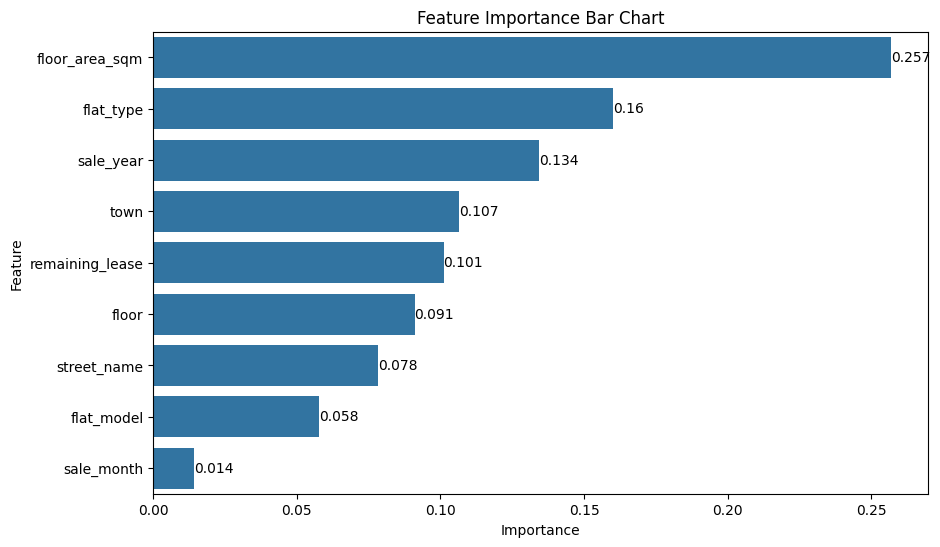

In [70]:
# Feature importance map

# Get feature importances
importance = best_rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances bar chart with value labels
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
for index, value in enumerate(feature_importances_df['Importance']):
    plt.text(value, index, str(round(value, 3)), ha='left', va='center')
plt.title('Feature Importance Bar Chart')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


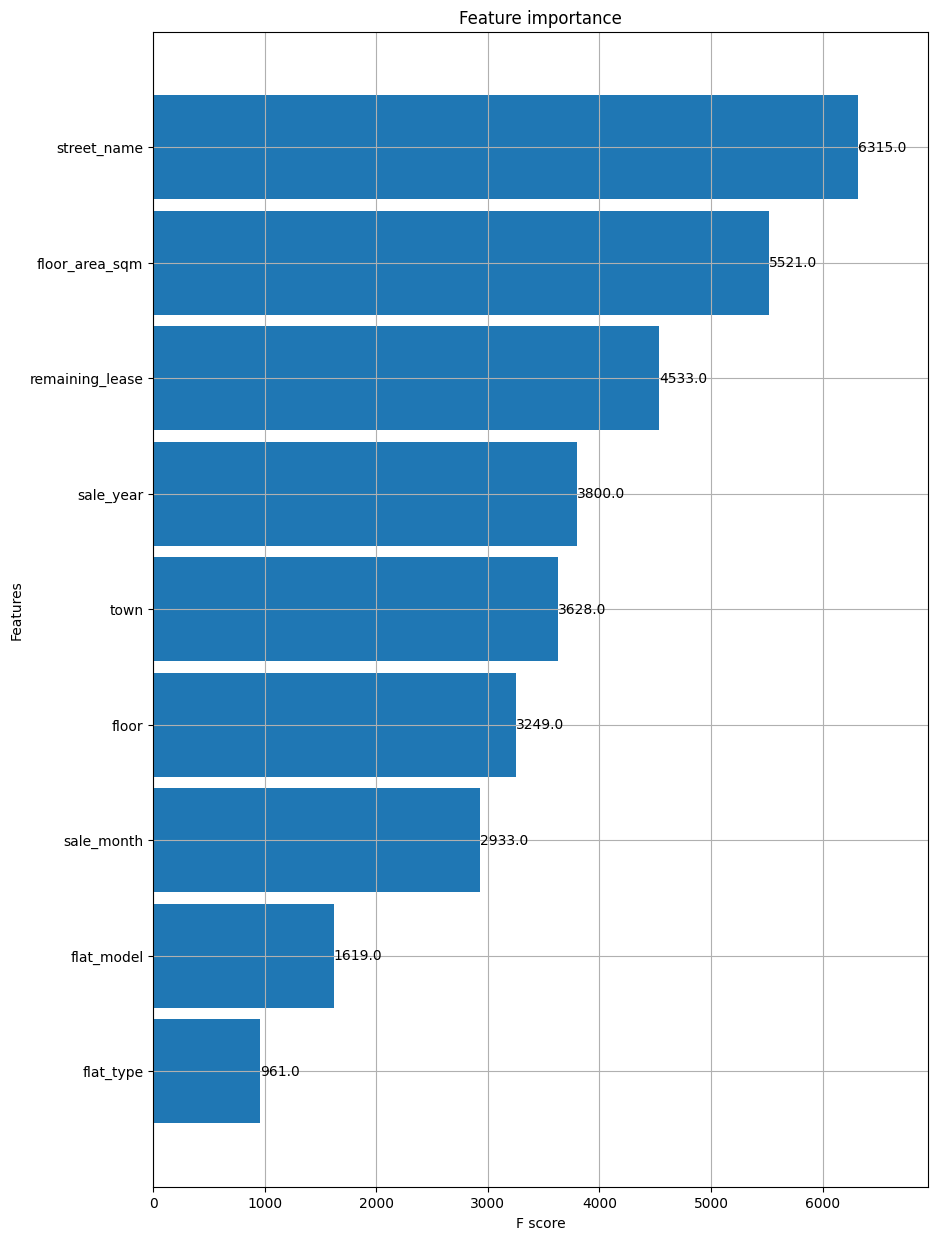

In [71]:
# Get feature importances
best_rf.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(10, 15))
plot_importance(best_xgb, height=0.9, ax=ax)
plt.show()


From the feature importance plot above, we can see that XGBoost and Random Forest weighs the features differently. Voting Regressor combines both Random Forest and XGboost models to prevent either model from giving extreme results due to anomaly in certain feature. Furthermore, Voting Regressor gives the lowest MAE. Therefore we choose voting regressor as our main model.

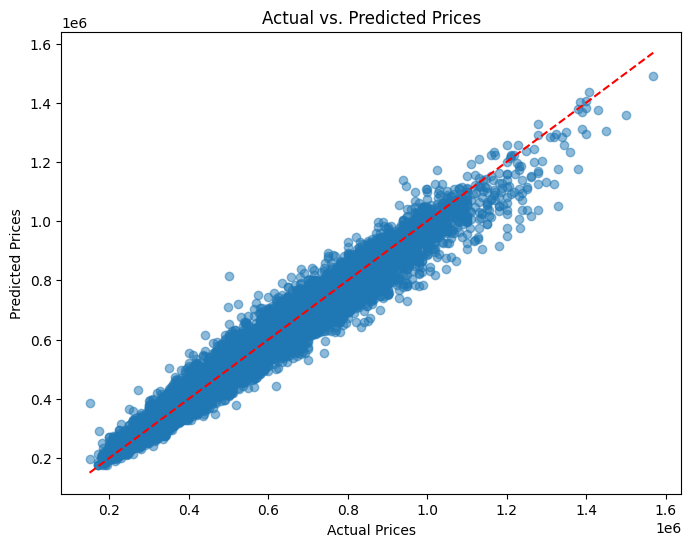

In [72]:
# Plotting Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect fit line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

Actual prices and predicted prices are closely correlated reflected by the extremely high R-squared value

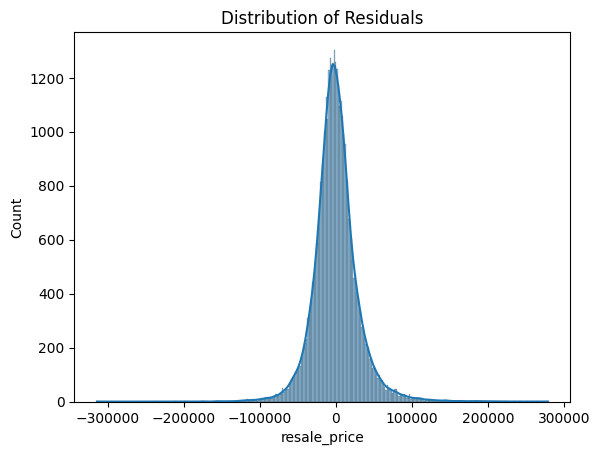

In [73]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

Residuals are mostly less than $100,000

## Export Model

In [74]:
import joblib

# Save the model
# Save the trained voting regressor model to a file
joblib.dump(voting_reg, 'voting_regressor_model.pkl')

print("Model saved as 'voting_regressor_model.pkl'")

Model saved as 'voting_regressor_model.pkl'
